In [48]:
from experiments.globals import CP4IM_DATASET_NAMES, SYNTH_NUM_TREES
import time
from typing import Tuple, Dict, Any
from maptree import search as maptree_search
from experiments.searchers.binary_classification_tree import BinaryClassificationTree
from experiments.searchers.maptree import *
from experiments.globals import get_stratified_k_folds_cp4im_dataset, get_full_cp4im_dataset, run_search, save_results
import pdb
import numpy as np
import json
import matplotlib.pyplot as plt
import os

In [35]:
from maptree_treefarms_conv import *

In [4]:
# treefarms optimal tree for tic tac toe dataset
treefarms_opt_ttt_dict = {
  "false": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.015706807374954224,
          "name": "27",
          "prediction": 0
        },
        "feature": 5,
        "name": "5",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 21,
      "name": "21",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "feature": 7,
        "name": "7",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 11,
    "name": "11",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 14,
        "name": "14",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.015706807374954224,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 2,
      "name": "2",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 20,
        "name": "20",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 26,
  "model_objective": 0.22424083948135376,
  "name": "26",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 8,
        "name": "8",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 20,
      "name": "20",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 14,
    "name": "14",
    "reference": 1,
    "relation": "==",
    "true": {
      "complexity": 0.009999999776482582,
      "loss": 0.03141361474990845,
      "name": "27",
      "prediction": 1
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.015706807374954224,
          "name": "27",
          "prediction": 0
        },
        "feature": 5,
        "name": "5",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 21,
      "name": "21",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 8,
        "name": "8",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 11,
    "name": "11",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 14,
        "name": "14",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.015706807374954224,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 2,
      "name": "2",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 20,
        "name": "20",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 26,
  "model_objective": 0.22424083948135376,
  "name": "26",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 8,
        "name": "8",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 20,
      "name": "20",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 14,
    "name": "14",
    "reference": 1,
    "relation": "==",
    "true": {
      "complexity": 0.009999999776482582,
      "loss": 0.03141361474990845,
      "name": "27",
      "prediction": 1
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 0
      },
      "feature": 14,
      "name": "14",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.04188481718301773,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "feature": 8,
    "name": "8",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 26,
        "name": "26",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 5,
      "name": "5",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "feature": 11,
        "name": "11",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 20,
  "model_objective": 0.22424083948135376,
  "name": "20",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 8,
      "name": "8",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "feature": 13,
        "name": "13",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 11,
    "name": "11",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.020942408591508865,
          "name": "27",
          "prediction": 0
        },
        "feature": 2,
        "name": "2",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 16,
      "name": "16",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 0
      },
      "feature": 14,
      "name": "14",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.04188481718301773,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "feature": 8,
    "name": "8",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 26,
        "name": "26",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 5,
      "name": "5",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "feature": 11,
        "name": "11",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 20,
  "model_objective": 0.22424083948135376,
  "name": "20",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 8,
      "name": "8",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "feature": 13,
        "name": "13",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 11,
    "name": "11",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.020942408591508865,
          "name": "27",
          "prediction": 0
        },
        "feature": 16,
        "name": "16",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 2,
      "name": "2",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 0
      },
      "feature": 14,
      "name": "14",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.04188481718301773,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "feature": 8,
    "name": "8",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 26,
        "name": "26",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 5,
      "name": "5",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "feature": 11,
        "name": "11",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 20,
  "model_objective": 0.22424083948135376,
  "name": "20",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.020942408591508865,
        "name": "27",
        "prediction": 1
      },
      "feature": 21,
      "name": "21",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "feature": 7,
        "name": "7",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 13,
    "name": "13",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 25,
      "name": "25",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 2,
        "name": "2",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 0
      },
      "feature": 14,
      "name": "14",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.04188481718301773,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "feature": 8,
    "name": "8",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 26,
        "name": "26",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 5,
      "name": "5",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "feature": 11,
        "name": "11",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 20,
  "model_objective": 0.22424083948135376,
  "name": "20",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 1
      },
      "feature": 7,
      "name": "7",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.020942408591508865,
          "name": "27",
          "prediction": 1
        },
        "feature": 21,
        "name": "21",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 13,
    "name": "13",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 11,
      "name": "11",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "feature": 2,
        "name": "2",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.015706807374954224,
          "name": "27",
          "prediction": 1
        },
        "feature": 4,
        "name": "4",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "feature": 16,
      "name": "16",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "feature": 7,
        "name": "7",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 11,
    "name": "11",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 14,
        "name": "14",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.015706807374954224,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 2,
      "name": "2",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 20,
        "name": "20",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 26,
  "model_objective": 0.22424083948135376,
  "name": "26",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 8,
        "name": "8",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 20,
      "name": "20",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 14,
    "name": "14",
    "reference": 1,
    "relation": "==",
    "true": {
      "complexity": 0.009999999776482582,
      "loss": 0.03141361474990845,
      "name": "27",
      "prediction": 1
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 0
      },
      "feature": 14,
      "name": "14",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.04188481718301773,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "feature": 8,
    "name": "8",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 26,
        "name": "26",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 5,
      "name": "5",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "feature": 11,
        "name": "11",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 20,
  "model_objective": 0.22424083948135376,
  "name": "20",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.020942408591508865,
        "name": "27",
        "prediction": 1
      },
      "feature": 21,
      "name": "21",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "feature": 7,
        "name": "7",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 13,
    "name": "13",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 11,
      "name": "11",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "feature": 2,
        "name": "2",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 0
      },
      "feature": 14,
      "name": "14",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.04188481718301773,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "feature": 8,
    "name": "8",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 26,
        "name": "26",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 5,
      "name": "5",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "feature": 11,
        "name": "11",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 20,
  "model_objective": 0.22424083948135376,
  "name": "20",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 1
      },
      "feature": 7,
      "name": "7",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.020942408591508865,
          "name": "27",
          "prediction": 1
        },
        "feature": 21,
        "name": "21",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 13,
    "name": "13",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 25,
      "name": "25",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 2,
        "name": "2",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "type": "integral"
}

print(make_bct(treefarms_opt_ttt_dict)) # works

((((5)21(7))11((14)2(20)))26(((8)20(23))14))


In [ ]:
homepath = os.getcwd() # in the maptree folder

with open(f"{homepath}/ttt_treefarms_rset.json", 'r') as file:
    ttt_treefarms_rset = json.load(file)

In [7]:
ttt_treefarms_rset

{'0': {'feature': 25,
  'relation': '==',
  'reference': 'true',
  'true': {'feature': 19,
   'relation': '==',
   'reference': 'true',
   'true': {'feature': 22,
    'relation': '==',
    'reference': 'true',
    'true': {'prediction': 0, 'name': 'Prediction'},
    'false': {'prediction': 1, 'name': 'Prediction'}},
   'false': {'feature': 16,
    'relation': '==',
    'reference': 'true',
    'true': {'feature': 7,
     'relation': '==',
     'reference': 'true',
     'true': {'prediction': 0, 'name': 'Prediction'},
     'false': {'prediction': 1, 'name': 'Prediction'}},
    'false': {'feature': 13,
     'relation': '==',
     'reference': 'true',
     'true': {'prediction': 0, 'name': 'Prediction'},
     'false': {'prediction': 1, 'name': 'Prediction'}}}},
  'false': {'feature': 14,
   'relation': '==',
   'reference': 'true',
   'true': {'prediction': 1, 'name': 'Prediction'},
   'false': {'feature': 20,
    'relation': '==',
    'reference': 'true',
    'true': {'feature': 23,
    

In [8]:
# convert every tree to maptree 
ttt_treefarms_rset_maptree = {k: make_bct(v) for k, v in ttt_treefarms_rset.items()}

In [ ]:
# getting posterior
dataset_name = CP4IM_DATASET_NAMES[13]
print(dataset_name)
data = get_full_cp4im_dataset(dataset_name)
X, y = data

tic-tac-toe


In [ ]:
ttt_treefarms_rset_maptree_posts = {k: v.log_posterior(X, y, **POSTERIOR) \
                                    for k, v in ttt_treefarms_rset_maptree.items()}

In [12]:
ttt_treefarms_rset_maptree_posts

{'0': -468.93409528856523,
 '1': -518.2652051909848,
 '2': -504.96082932331876,
 '3': -463.40047683313355,
 '4': -498.87687022671724,
 '5': -495.0168583539795,
 '6': -520.7036043189648,
 '7': -505.5382542234124,
 '8': -514.0648359888987,
 '9': -488.79067949591956,
 '10': -516.5314420956964,
 '11': -491.2572856027174,
 '12': -531.9632099670893,
 '13': -506.6890534741101,
 '14': -520.1326578931402,
 '15': -506.83909246881876,
 '16': -516.8882428718048,
 '17': -503.5946774474834,
 '18': -485.8243516709467,
 '19': -487.9678880190572,
 '20': -476.4999942058076,
 '21': -466.2031125704989,
 '22': -467.05154582935126,
 '23': -475.682286446562,
 '24': -500.34900916806026,
 '25': -517.7610593931716,
 '26': -545.1395523701535,
 '27': -485.1836590725078,
 '28': -502.5957092976192,
 '29': -529.9742022746011,
 '30': -498.8339761826901,
 '31': -516.2460264078014,
 '32': -543.6245193847833,
 '33': -473.55981968971093,
 '34': -490.97186991482226,
 '35': -518.3503628918041,
 '36': -495.5895611613547,
 '

In [13]:
# turn optimal maptree into dict representation to get treefarms objective

res = run(X, y)
tree_1 = res["tree"]
print(tree_1) # str rep of original tree
print(parse_tree(tree_1)) # dict representation of tree

(((19((25(22))1(10)))7((25(16))1(4)))13((20((26(23))2(11)))8((26(17))2(5))))
{'feature': 13, 'left': {'feature': 7, 'left': {'feature': 19, 'left': None, 'right': {'feature': 1, 'left': {'feature': 25, 'left': None, 'right': {'feature': 22, 'left': {'feature': None, 'left': None, 'right': None, 'prediction': 1}, 'right': {'feature': None, 'left': None, 'right': None, 'prediction': 0}}}, 'right': {'feature': 10, 'left': {'feature': None, 'left': None, 'right': None, 'prediction': 1}, 'right': {'feature': None, 'left': None, 'right': None, 'prediction': 0}}}}, 'right': {'feature': 1, 'left': {'feature': 25, 'left': None, 'right': {'feature': 16, 'left': {'feature': None, 'left': None, 'right': None, 'prediction': 1}, 'right': {'feature': None, 'left': None, 'right': None, 'prediction': 0}}}, 'right': {'feature': 4, 'left': {'feature': None, 'left': None, 'right': None, 'prediction': 1}, 'right': {'feature': None, 'left': None, 'right': None, 'prediction': 0}}}}, 'right': {'feature': 8, '

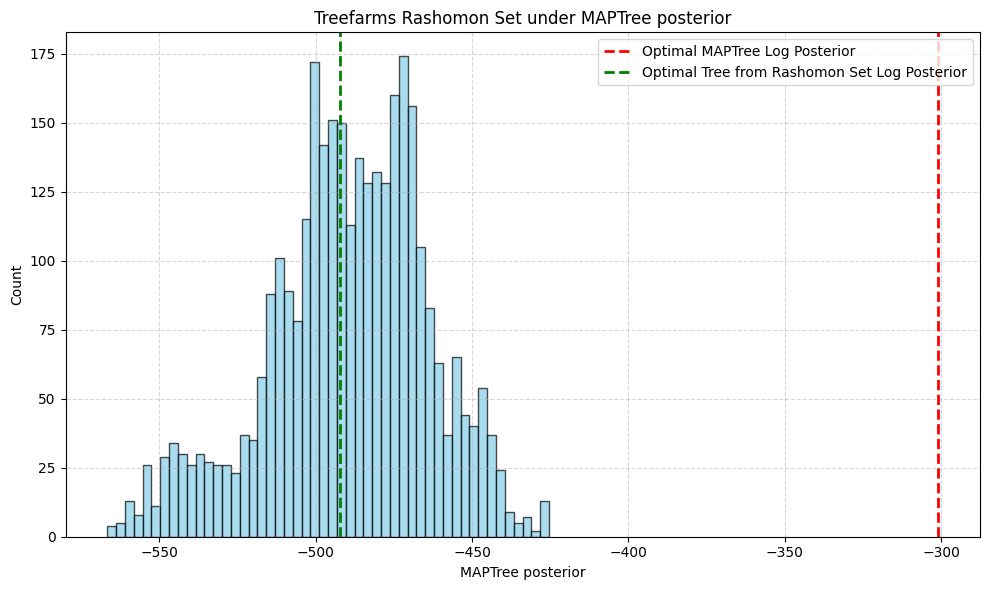

In [ ]:
# tree_1.log_posterior(X, y, **POSTERIOR)
# ttt_treefarms_rset_maptree_posts
# optimal treefarms tree's log posterior
opt_treefarms_post = make_bct(treefarms_opt_ttt_dict).log_posterior(X, y, **POSTERIOR)
opt_maptree_post = tree_1.log_posterior(X, y, **POSTERIOR)

plt.figure(figsize=(10, 6))
plt.hist(ttt_treefarms_rset_maptree_posts.values(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(opt_maptree_post, color='red', linestyle='--', linewidth=2, label='Optimal MAPTree Log Posterior')
plt.axvline(opt_treefarms_post, color='green', linestyle='--', linewidth=2, label='Optimal Tree from Rashomon Set Log Posterior')

plt.title("Treefarms Rashomon Set under MAPTree posterior")
plt.xlabel("MAPTree posterior")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
maptree_opt_tree_dict = parse_tree(tree_1)

In [38]:
def relabel(tree_dict):
    if not isinstance(tree_dict, dict):
        return tree_dict

    new_dict = {}
    for key, value in tree_dict.items():
        if key == "left":
            new_dict["false"] = relabel(value)
        elif key == "right":
            new_dict["true"] = relabel(value)
        else:
            new_dict[key] = relabel(value)
    return new_dict

maptree_opt_tree_dict = relabel(maptree_opt_tree_dict)